In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

In [2]:
df = pd.read_csv('/home/sam/MachineLearning22/datasets/Churn_Modelling.csv')

In [3]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
corr = df.corr()

<AxesSubplot:>

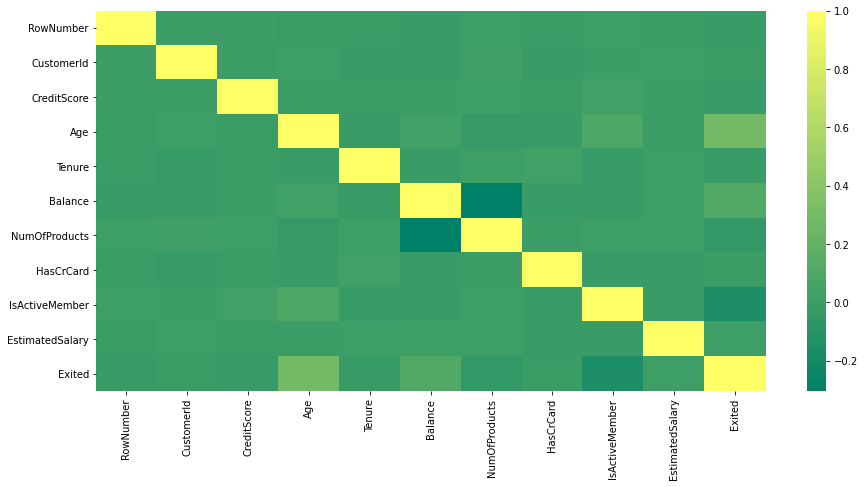

In [5]:
plt.figure(figsize = (15, 7))
sns.heatmap(corr, cmap='summer')

In [6]:
# remove nonuse columns
rem_col = ['CustomerId', 'Surname']
df.drop(rem_col, inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# lets collect only int and float columns
ncol = [col for col in df.columns if df[col].dtypes != 'O']

/home/sam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

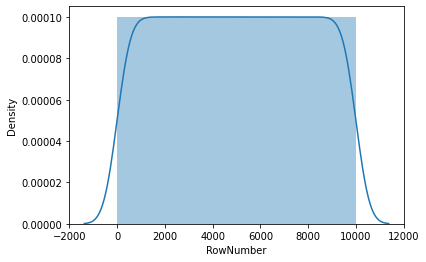

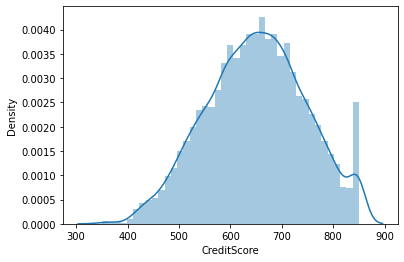

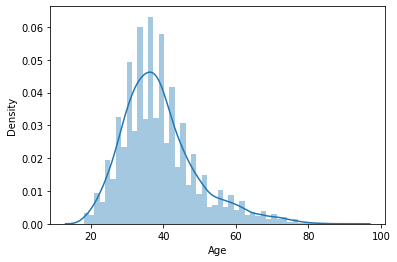

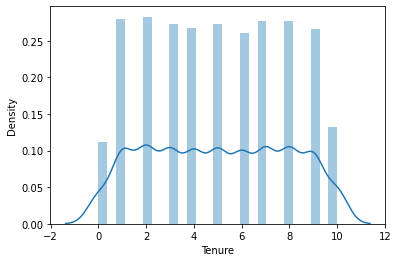

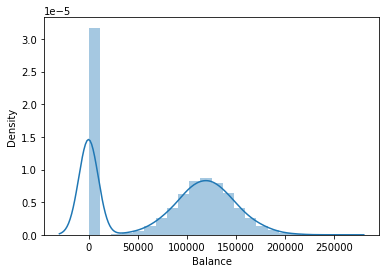

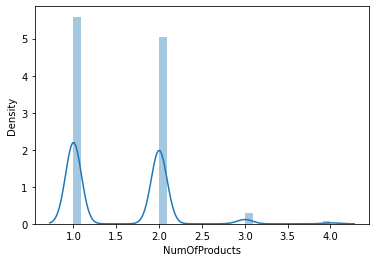

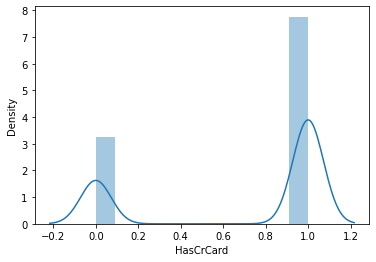

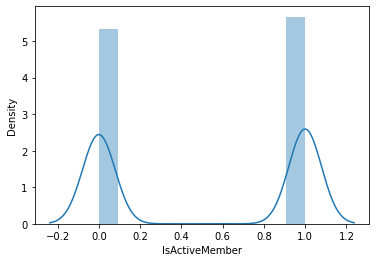

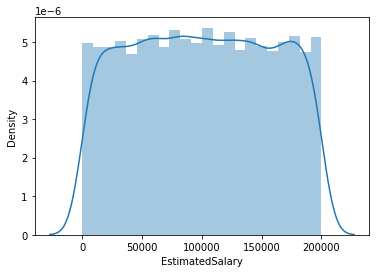

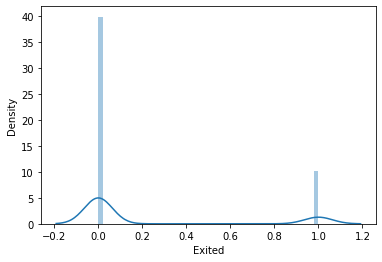

In [9]:
for col in ncol:
    plt.figure()
    sns.distplot(df[col], kde=True)


/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Geography', ylabel='count'>

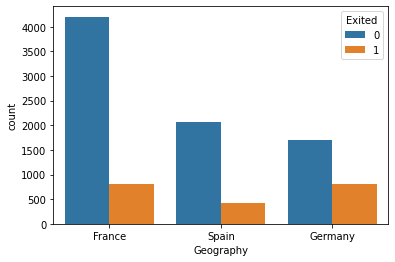

In [10]:
sns.countplot(df['Geography'], hue=df['Exited'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Geography', ylabel='count'>

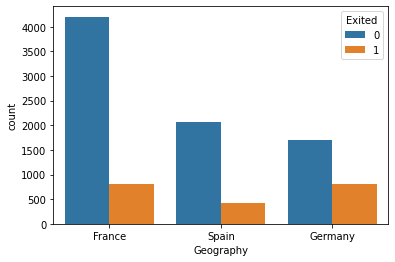

In [11]:
sns.countplot(df['Geography'], hue=df['Exited'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Tenure', ylabel='count'>

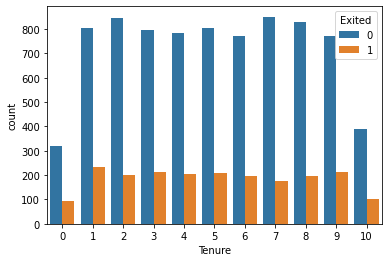

In [12]:
sns.countplot(df['Tenure'], hue=df['Exited'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

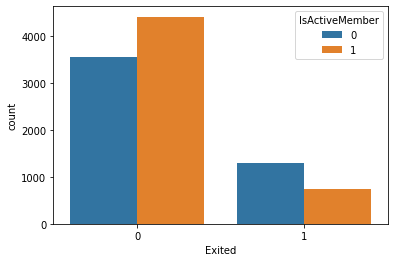

In [13]:
sns.countplot(df['Exited'], hue=df['IsActiveMember'])

## lets build model

In [14]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# lets convert object to dummies variable
df = pd.get_dummies(df, drop_first = True)

In [16]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
# lets creat X and Y variable
X = df.drop('Exited', axis = 1)
Y = df['Exited']

## training model without scaling data

In [18]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.45) 

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_train)
model.score(x_test, y_test)

0.7913333333333333

In [20]:
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(n_estimators=100)
ranmodel.fit(x_train, y_train)
ranmodel.score(x_test, y_test)

0.856

In [21]:
from sklearn.naive_bayes import GaussianNB
gunb = GaussianNB()
gunb.fit(x_train, y_train)
gunb.score(x_test, y_test)

0.7782222222222223

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train, y_train)
knnmodel.score(x_test, y_test)

0.7533333333333333

In [23]:
from sklearn import svm
svmmodel = svm.SVC(kernel='rbf')
svmmodel.fit(x_train, y_train)
svmmodel.score(x_test, y_test)

0.7922222222222223

Trained with all models but the best score was given by RandomForest hence GoThroughRandomForest

## Start with Random Forest Lets try to improve score

In [25]:
df = pd.DataFrame(df_scale, index=df.index, columns=df.columns)

<AxesSubplot:>

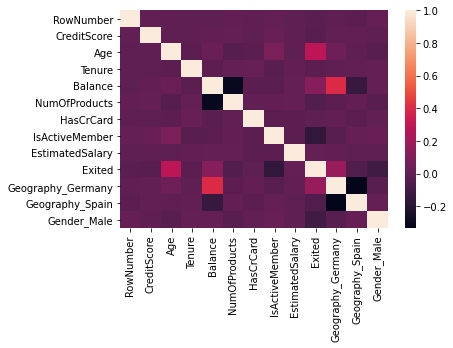

In [26]:
sns.heatmap(df.corr())

In [27]:
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(n_estimators=100)
ranmodel.fit(x_train, y_train)
ranmodel.score(x_test, y_test)

0.8524444444444444

In [28]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(ranmodel, x_test, y_test, cv = 10)
cvs.mean()

0.8582222222222222

In [29]:
# lets try some feature engineering
corr = abs(df.corr())

In [30]:
# create function to check corr values
hccol = set()
for col in df.columns:
    for row in df.columns:
        val = df[col].corr(other=df[row])
        if abs(val)>0.08:
            print(col, row)

RowNumber RowNumber
CreditScore CreditScore
Age Age
Age IsActiveMember
Age Exited
Tenure Tenure
Balance Balance
Balance NumOfProducts
Balance Exited
Balance Geography_Germany
Balance Geography_Spain
NumOfProducts Balance
NumOfProducts NumOfProducts
HasCrCard HasCrCard
IsActiveMember Age
IsActiveMember IsActiveMember
IsActiveMember Exited
EstimatedSalary EstimatedSalary
Exited Age
Exited Balance
Exited IsActiveMember
Exited Exited
Exited Geography_Germany
Exited Gender_Male
Geography_Germany Balance
Geography_Germany Exited
Geography_Germany Geography_Germany
Geography_Germany Geography_Spain
Geography_Spain Balance
Geography_Spain Geography_Germany
Geography_Spain Geography_Spain
Gender_Male Exited
Gender_Male Gender_Male


In [31]:
hccol

set()

In [32]:
df.corr().describe().loc[['mean']].mean().mean()

0.07597044596592376

In [33]:
df.drop(['Gender_Male'] ,axis =1, inplace =True)


In [34]:

# lets creat X and Y variable
X = df.drop('Exited', axis = 1)
Y = df['Exited']

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.45) 

In [40]:
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(n_estimators=100)
# ranmodel.fit(x_train, y_train)
# ranmodel.score(x_test, y_test)
